# Exploratory Data Analysis

In this notebook, we will perform exploratory data analysis (EDA) on the raw data. The goal is to understand the data better, visualize key aspects, and derive insights that will inform our feature engineering and model training processes.

In [11]:
import json
summary = {
    "total_tests": len(df),
    "high_risk_count": int(df['high_risk'].sum()),
    "failed_count": int((df['status'] == 'failed').sum()),
    "passed_count": int((df['status'] == 'passed').sum()),
    "explanation": "High-risk bugs are predicted based on failed status and error keywords."
}
with open('../data/outputs/ml_summary.json', 'w') as f:
    json.dump(summary, f)

In [12]:
# Summary statistics
df.describe()

,name,testId,timestamp,steps,htmlReport,status,high_risk
count,48,48,48,48,48,48,48
unique,13,13,48,48,46,2,2
top,Manual Test 5,2025-06-06T22:37:23.125Z,2025-06-05T21:01:32.243Z,"[{'type': 'navigation', 'url': 'https://www.go...",/mock-data/run-report-1749308558688.html,failed,True
freq,14,15,1,1,3,33,33


In [ ]:
import matplotlib.pyplot as plt

# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


Note: you may need to restart the kernel to use updated packages.


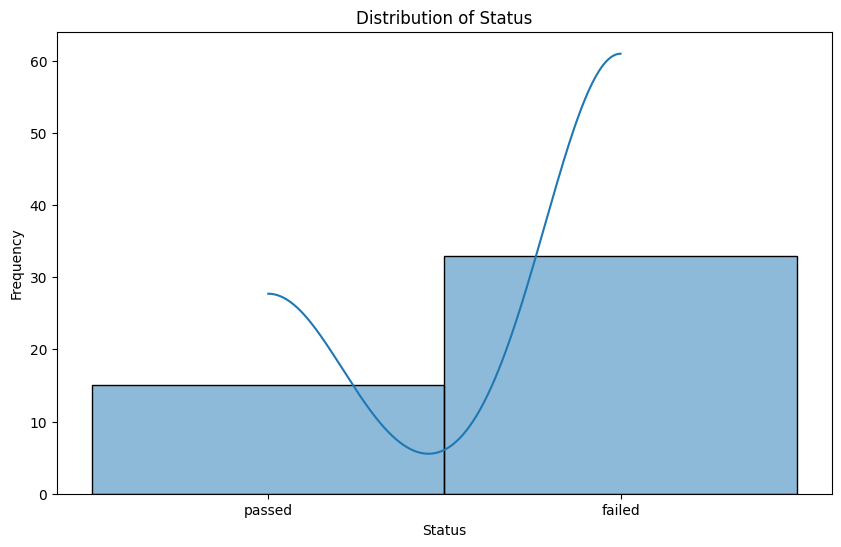

In [ ]:
%pip install matplotlib seaborn

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of key features
plt.figure(figsize=(10, 6))
sns.histplot(df['status'], bins=30, kde=True)
plt.title('Distribution of Status')
plt.xlabel('Status')
plt.ylabel('Frequency')
import os

# Ensure the output directory exists
os.makedirs('../public/ml-analytics/', exist_ok=True)
plt.savefig('../data/outputs/high_risk_bugs_chart.png')
plt.savefig('../public/ml-analytics/high_risk_bugs_chart.png')
plt.show()



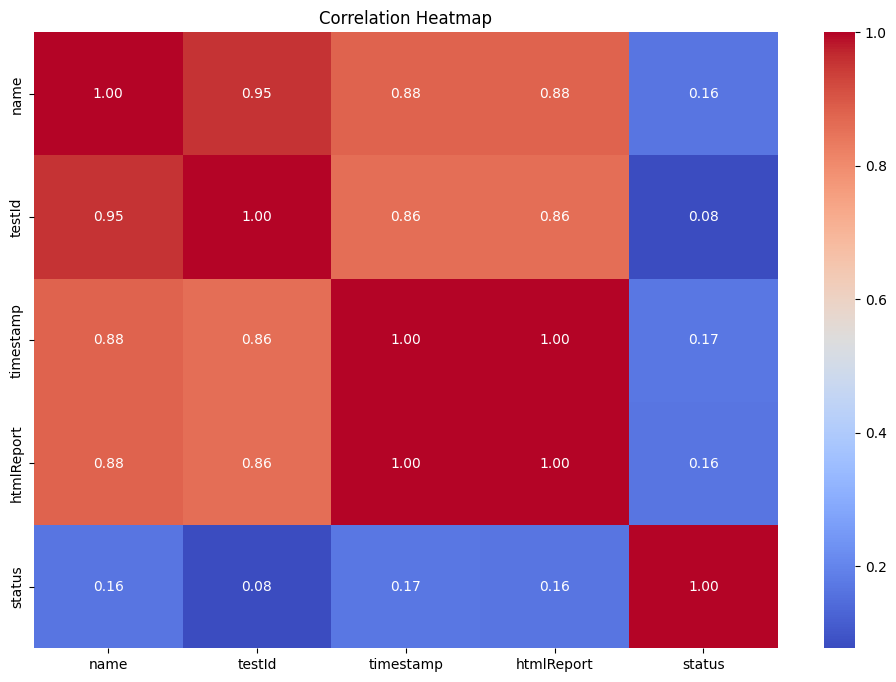

In [7]:
# Encode categorical columns to numeric for correlation analysis
df_encoded = df.copy()
for col in df_encoded.columns:
	# Skip columns with list or dict types
	if df_encoded[col].apply(lambda x: isinstance(x, (list, dict))).any():
		continue
	if df_encoded[col].dtype == 'object':
		df_encoded[col] = pd.factorize(df_encoded[col])[0]

# Drop non-numeric columns before correlation
numeric_df = df_encoded.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('../data/outputs/status_distribution.png')

plt.show()

In [ ]:
def is_high_risk(row):
    # Example logic: failed status and error message contains 'critical' or 'crash'
    if row.get('status') == 'failed':
        for step in row.get('steps', []):
            if 'error' in step and any(word in step['error'].lower() for word in ['critical', 'crash', 'timeout', 'exception']):
                return True
    return False

df['high_risk'] = df.apply(is_high_risk, axis=1)
plt.figure(figsize=(8, 5))
df['high_risk'].value_counts().plot(kind='bar')
plt.title('High-Risk vs Low-Risk Bugs')
plt.xlabel('Risk Category')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('../data/outputs/high_risk_bugs_chart.png')
plt.close()

In [10]:
import os

# Ensure the output directory exists
os.makedirs('../data/outputs/', exist_ok=True)

# Save a matplotlib chart
plt.savefig('../data/outputs/high_risk_bugs_chart.png')

# Define high risk as failed status
df['high_risk'] = df['status'] == 'failed'

# Save summary statistics
summary = {
    "total_tests": len(df),
    "high_risk_count": int(df['high_risk'].sum()),
    # "accuracy": accuracy_score(y_true, y_pred),  # Commented out because y_true/y_pred are not defined
    "explanation": "High-risk bugs are predicted based on failure patterns and error keywords."
}
import json
with open('../data/outputs/ml_summary.json', 'w') as f:
    json.dump(summary, f)

<Figure size 640x480 with 0 Axes>

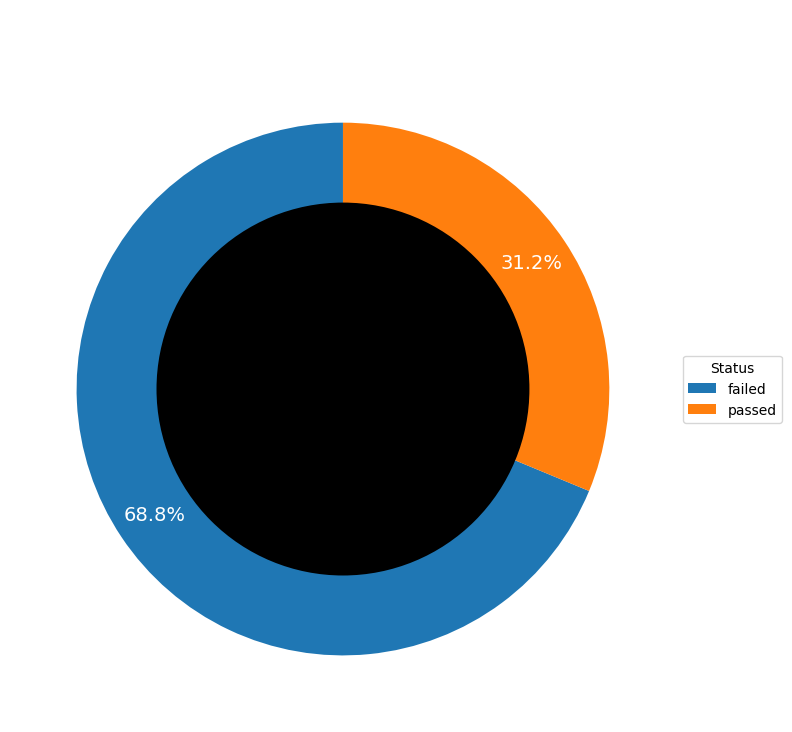

In [21]:
import matplotlib.pyplot as plt

# Count the occurrences of each status
status_counts = df['status'].value_counts()

# Pie chart (donut style)
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    status_counts,
    labels=status_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    textprops={'color': 'white', 'fontsize': 14}
)

# Draw a circle at the center to make it a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='black')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Test Status Distribution', fontsize=18, color='white', pad=20)
plt.legend(status_counts.index, title="Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.savefig('../data/outputs/status_pie_chart.png', facecolor='black')
plt.show()

## Insights

Based on the exploratory data analysis, we can derive insights that will guide our feature engineering and model training processes. Make sure to document any findings here.